<a href="https://colab.research.google.com/github/Jamess200/MyBirdNetTest/blob/Branch_1.0/Inital_BN_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [20]:
!pip3 install birdnetlib
!pip3 install tflite-runtime
!pip3 install resampy

# Install ffmpeg
!apt-get install -y ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [23]:
# Verify that all required libraries are installed
try:
    import resampy
    import birdnetlib
    import tflite_runtime
    import ffmpeg
    print("All required libraries are installed and available.")
except ImportError as e:
    print(f"Library installation issue: {e}")

ModuleNotFoundError: No module named 'ffmpeg'

In [5]:
from birdnetlib import Recording
from birdnetlib.analyzer import Analyzer
from datetime import datetime

In [14]:
import os
# get the data
dataDir = '/content/drive/MyDrive/HAUtrans/Trans7/'

# List all files in the directory
file_names = os.listdir(dataDir)

# Get the file names
print(file_names)

['ED1_20240502_040000.wav', 'ED1_20240502_050000.wav', 'ED1_20240502_060000.wav', 'ED1_20240502_070000.wav', 'ED1_20240502_080000.wav', 'ED1_20240502_090000.wav', 'ED1_20240503_040000.wav', 'ED1_20240503_050000.wav', 'ED1_20240503_060000.wav', 'ED1_20240503_070000.wav', 'ED1_20240503_080000.wav', 'ED1_20240503_090000.wav', 'ED1_20240504_040000.wav', 'ED1_20240504_050000.wav', 'ED1_20240504_060000.wav', 'ED1_20240504_070000.wav', 'ED1_20240504_080000.wav', 'ED1_20240504_090000.wav', 'ED1_20240505_040000.wav', 'ED1_20240505_050000.wav', 'ED1_20240505_060000.wav', 'ED1_20240505_070000.wav', 'ED1_20240505_080000.wav', 'ED1_20240505_090000.wav', 'ED1_20240506_040000.wav', 'ED1_20240506_050000.wav', 'ED1_20240506_060000.wav', 'ED1_20240506_070000.wav', 'ED1_20240506_080000.wav', 'ED1_20240506_090000.wav', 'ED1_20240507_040000.wav', 'ED1_20240507_050000.wav', 'ED1_20240507_060000.wav', 'ED1_20240507_070000.wav', 'ED1_20240507_080000.wav', 'ED1_20240507_090000.wav', 'ED1_20240508_040000.wav', 

In [15]:
# This cell uses BirdNET-Analyzer to analyze multiple recordings.
# Load and initialize the BirdNET-Analyzer models.
analyzer = Analyzer()

Labels loaded.
load model True
Model loaded.
Labels loaded.
load_species_list_model
Meta model loaded.


In [16]:
testamp = [52.911,-2.4441] # near Market Drayton year=2024, month=4, day=20

# Create a dictionary to store the results
results = {}

In [11]:
# Loop through all file names
for file_name in file_names:
    try:
      # Include the correct path to the data files
      file_path = os.path.join(dataDir, file_name)
      recording = Recording(
          analyzer,
          file_path,  # path to the recording file
          lat=testamp[0], # latitude of the recording location
          lon=testamp[1], # longitude of the recording location
          date=datetime(year=2024, month=4, day=20), # use date or week_48
          min_conf=0.25,
      )
      # Analyze the recording and store the result in the dictionary
      recording.analyze()
      results[file_name] = recording.detections
    except Exception as e:
      print(f"Error processing {file_name}: {e}")

read_audio_data

Error processing ED1_20240502_040000.wav: Generic audio read error occurred from librosa.
read_audio_data
read_audio_data: complete, read  600 chunks.
analyze_recording ED1_20240502_050000.wav
recording has lon/lat
set_predicted_species_list_from_position
return_predicted_species_list
15
145 species loaded.


KeyboardInterrupt: 

In [17]:
# Sample results dictionary (to be replaced with your actual results)
results = {
    'ED3_20240504_060000.wav': [{'common_name': 'House Finch', 'confidence': 0.5744, 'end_time': 12.0, 'scientific_name': 'Haemorhous mexicanus', 'start_time': 9.0, 'label': 'Haemorhous mexicanus_House Finch'}],
    'ED3_20240507_060000.wav': [{'common_name': 'House Finch', 'confidence': 0.4496, 'end_time': 15.0, 'scientific_name': 'Haemorhous mexicanus', 'start_time': 12.0, 'label': 'Haemorhous mexicanus_House Finch'}],
}

In [18]:
# Flatten the results dictionary
flattened_data = []
for filename, records in results.items():
    for record in records:
        record['filename'] = filename
        flattened_data.append(record)

# Convert the flattened data to a DataFrame
df = pd.DataFrame(flattened_data)

# Save the DataFrame to a CSV file
csv_file_path = '/content/drive/MyDrive/test.csv'
df.to_csv(csv_file_path, index=False)

print(f"Results have been successfully converted to CSV and saved to {csv_file_path}")

NameError: name 'pd' is not defined

In [ ]:
import json

# Save results to JSON file
results_path5 = '/content/drive/MyDrive/BirdNET_results6.json'
with open(results_path5, 'w') as json_file:
    json.dump(results, json_file)

print(f"Results saved to {results_path5}")


Results saved to /content/drive/MyDrive/BirdNET_results5.json


In [ ]:
# Load results from JSON file
with open(results_path5, 'r') as json_file:
    loaded_results = json.load(json_file)

# Verify loaded results
print(loaded_results)


{'ED3_20240502_040000.wav': [{'common_name': 'Barn Owl', 'scientific_name': 'Tyto alba', 'start_time': 21.0, 'end_time': 24.0, 'confidence': 0.2593682110309601, 'label': 'Tyto alba_Barn Owl'}, {'common_name': 'Mallard', 'scientific_name': 'Anas platyrhynchos', 'start_time': 42.0, 'end_time': 45.0, 'confidence': 0.6129375696182251, 'label': 'Anas platyrhynchos_Mallard'}, {'common_name': 'Mallard', 'scientific_name': 'Anas platyrhynchos', 'start_time': 48.0, 'end_time': 51.0, 'confidence': 0.5092365741729736, 'label': 'Anas platyrhynchos_Mallard'}, {'common_name': 'Mallard', 'scientific_name': 'Anas platyrhynchos', 'start_time': 51.0, 'end_time': 54.0, 'confidence': 0.7270328402519226, 'label': 'Anas platyrhynchos_Mallard'}, {'common_name': 'Mallard', 'scientific_name': 'Anas platyrhynchos', 'start_time': 96.0, 'end_time': 99.0, 'confidence': 0.26213034987449646, 'label': 'Anas platyrhynchos_Mallard'}, {'common_name': 'Mallard', 'scientific_name': 'Anas platyrhynchos', 'start_time': 99.0

In [ ]:
import pandas as pd

# Define minimum confidence threshold for post-processing
set_min_conf = 0.5  # Set minimum confidence threshold for post-processing

# Filter results with confidence below set_min_conf
filtered_results = {}
for file_name, detections in loaded_results.items():
    filtered_detections = [detection for detection in detections if detection['confidence'] >= set_min_conf]
    filtered_results[file_name] = filtered_detections


In [ ]:
# Convert the nested dictionaries into a list of dictionaries
data = []
for file_name, detections in filtered_results.items():
    for detection in detections:
        detection['file_name'] = file_name  # Add the file name to the detection dictionary
        data.append(detection)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)

In [ ]:
# Extract the hour from the file name
df['hour'] = df['file_name'].str.split('_').str[2].str[:2].astype(int)

# Group by hour and common_name, and count the number of detections for each
counts_by_hour = df.groupby(['common_name', 'hour']).size().unstack(fill_value=0)

# The result is a DataFrame where each row corresponds to a file, each column corresponds to a bird species,
# and the cell values are the counts of detections for each species in each file

print(counts)

file_name                  ED3_20240502_040000.wav  ED3_20240502_050000.wav  \
common_name                                                                   
Canada Goose                                     0                        0   
Carrion Crow                                     0                        1   
Common Buzzard                                   0                        0   
Common Chiffchaff                                0                        0   
Common Cuckoo                                    0                        0   
Common Raven                                     0                        0   
Common Redshank                                  0                        0   
Common Wood-Pigeon                               0                        0   
Dunlin                                           0                        0   
Dunnock                                          0                        0   
Eurasian Blackbird                               0  

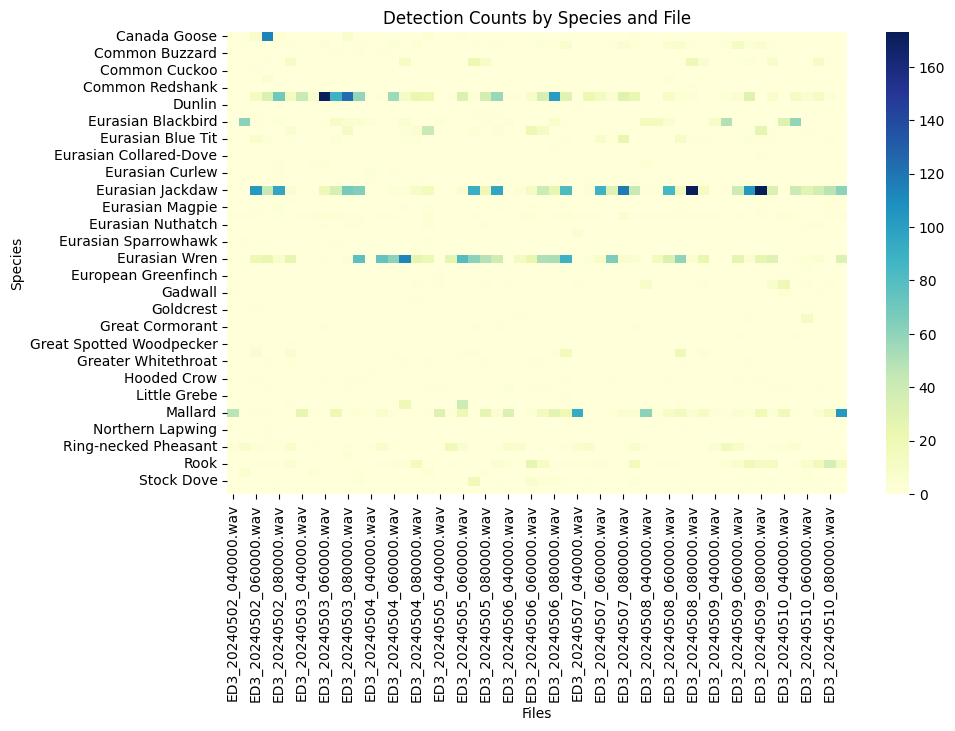

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the detection counts for each species in each file
plt.figure(figsize=(10, 6))
sns.heatmap(counts, cmap="YlGnBu")
plt.xlabel("Files")
plt.ylabel("Species")
plt.title("Detection Counts by Species and File")
plt.show()


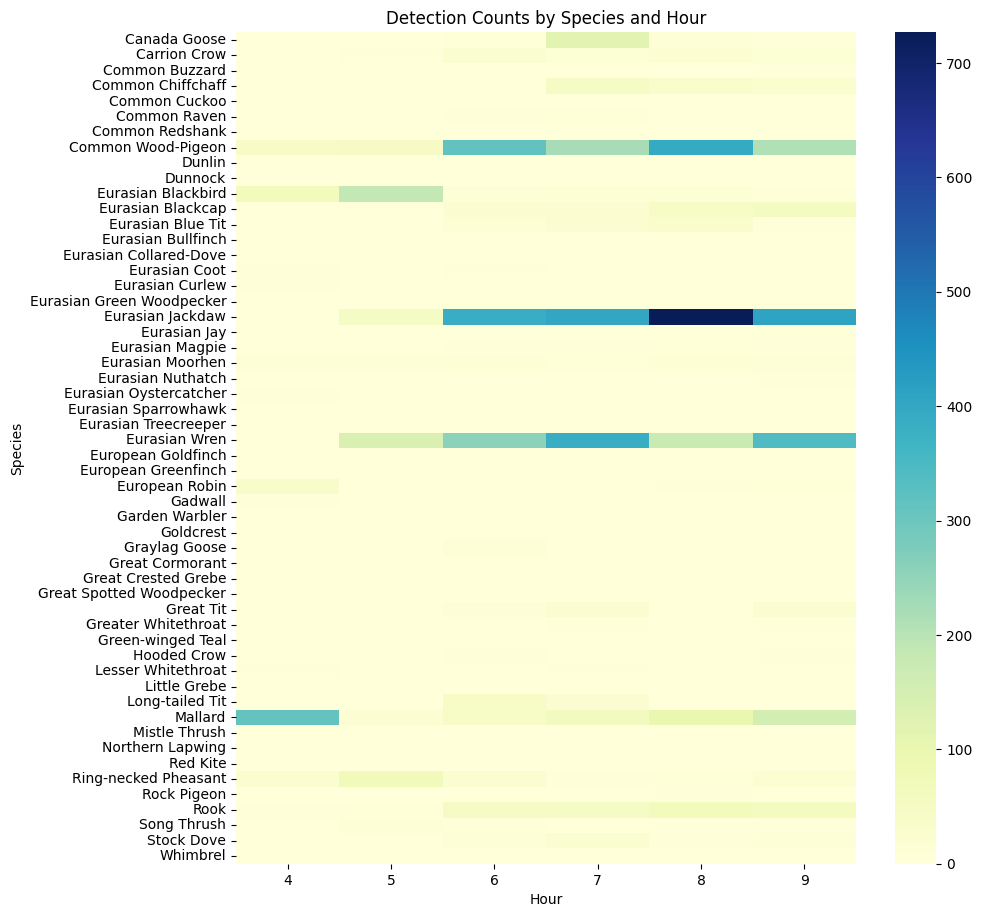

In [ ]:
import matplotlib.pyplot as plt
# Create a heatmap of the detection counts for each species in each hour
plt.figure(figsize=(10, len(counts_by_hour.index) * 0.2))  # Adjust height based on number of species
sns.heatmap(counts_by_hour, cmap="YlGnBu")
plt.xlabel("Hour")
plt.ylabel("Species")
plt.title("Detection Counts by Species and Hour")
plt.show()